In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
pd.options.display.max_colwidth = 300
pd.set_option('display.max_columns', 1000)





In [47]:
carData = pd.read_table(r"D:\FLAT_CMPL.txt", error_bad_lines = False,  encoding = 'ISO-8859-1')




b'Skipping line 562494: expected 49 fields, saw 70\n'
b'Skipping line 1032228: expected 49 fields, saw 50\n'
b'Skipping line 1208328: expected 49 fields, saw 50\n'
b'Skipping line 1293123: expected 49 fields, saw 50\n'
b'Skipping line 1297996: expected 49 fields, saw 50\nSkipping line 1297997: expected 49 fields, saw 50\nSkipping line 1297998: expected 49 fields, saw 50\n'
b'Skipping line 1317867: expected 49 fields, saw 50\nSkipping line 1322779: expected 49 fields, saw 50\nSkipping line 1324687: expected 49 fields, saw 50\n'
b'Skipping line 1331383: expected 49 fields, saw 50\nSkipping line 1334710: expected 49 fields, saw 50\n'
C:\Users\owen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (32,33,34,35,36,38,39,40,41,42,43,44,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [48]:
carData.columns = ['cmplid', 'odino', 'mfr_name', 'maketxt', 'modeltxt','yeartxt', 'crash','faildate','fire','injured','deaths','compdesc','city', 'state', 'vin', 'datea', 'ldate', 'miles', 'occurences', 'cdescr', 'cmpl_type', 'police_rpt_yn', 'purch_dt', 'orig_owner_yn', 'anti_breaks_yn', 'cruise_cont_yn', 'num_cyls', 'drive_train', 'fuel_sys', 'fuel_type', 'trans_type', 'veh_speed', 'dot', 'tire_size', 'loc_of_tire', 'tire_fail_type','orig_equip_yn', 'manuf_dt', 'seat_type', 'restraint_type', 'dealer_name', 'dealer_tel', 'dealer_city', 'dealer_state', 'dealer_zip', 'prod_type', 'repaired_yn', 'medical_attn', 'veichles_towed_yn'] 

In [49]:
analyzer = SentimentIntensityAnalyzer()



In [50]:
carData.keys()



Index(['cmplid', 'odino', 'mfr_name', 'maketxt', 'modeltxt', 'yeartxt',
       'crash', 'faildate', 'fire', 'injured', 'deaths', 'compdesc', 'city',
       'state', 'vin', 'datea', 'ldate', 'miles', 'occurences', 'cdescr',
       'cmpl_type', 'police_rpt_yn', 'purch_dt', 'orig_owner_yn',
       'anti_breaks_yn', 'cruise_cont_yn', 'num_cyls', 'drive_train',
       'fuel_sys', 'fuel_type', 'trans_type', 'veh_speed', 'dot', 'tire_size',
       'loc_of_tire', 'tire_fail_type', 'orig_equip_yn', 'manuf_dt',
       'seat_type', 'restraint_type', 'dealer_name', 'dealer_tel',
       'dealer_city', 'dealer_state', 'dealer_zip', 'prod_type', 'repaired_yn',
       'medical_attn', 'veichles_towed_yn'],
      dtype='object')

In [51]:
carData

,cmplid,odino,mfr_name,maketxt,modeltxt,yeartxt,crash,faildate,fire,injured,deaths,compdesc,city,state,vin,datea,ldate,miles,occurences,cdescr,cmpl_type,police_rpt_yn,purch_dt,orig_owner_yn,anti_breaks_yn,cruise_cont_yn,num_cyls,drive_train,fuel_sys,fuel_type,trans_type,veh_speed,dot,tire_size,loc_of_tire,tire_fail_type,orig_equip_yn,manuf_dt,seat_type,restraint_type,dealer_name,dealer_tel,dealer_city,dealer_state,dealer_zip,prod_type,repaired_yn,medical_attn,veichles_towed_yn
0,2,958156.0,TOYOTA MOTOR CORPORATION,TOYOTA,PASEO,1994.0,Y,19941226.0,N,0.0,0.0,PARKING BRAKE:CONVENTIONAL,SAN JOSE,CA,JT2EL45U5R0,19950103,19950103,NaN,1.0,PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAGED VEHICLE ROLLED REARWARD. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
1,3,958124.0,TOYOTA MOTOR CORPORATION,TOYOTA,COROLLA,1994.0,Y,19941128.0,N,0.0,0.0,AIR BAGS:FRONTAL,PHOENIX,AZ,NaN,19950103,19950103,NaN,NaN,"UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPLOY. VEHICLE CLASSIFIED AS TOTALED. PLEASE DESCRIBE DETAILS. TT",EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
2,4,958122.0,"NISSAN NORTH AMERICA, INC.",NISSAN,MAXIMA,1994.0,NaN,19950103.0,N,0.0,0.0,SUSPENSION,TUCSON,AZ,JN1HJ01F4RT,19950103,19950103,NaN,NaN,THE STRUT WAS BAD THERE IS A NOISE ON THE PASSENGER SIDE DOOR AND THE ENGINE LIGHT MALFUNCTION. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
3,5,958247.0,"NISSAN NORTH AMERICA, INC.",NISSAN,PATHFINDER,1994.0,NaN,NaN,N,0.0,0.0,SUSPENSION:FRONT,ABINGDON,MD,NaN,19950103,19950103,NaN,NaN,FRONT TIRES SHOW EXCESSIVE WEAR AND STEEL BELTS. NISSAN IS OFFERING TO REPLACE TWO TIRES. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
4,6,958161.0,GERRY,GERRY,CHILD SAFETY SEAT,1993.0,NaN,19941231.0,NaN,0.0,0.0,CHILD SEAT,AURORA,CO,NaN,19950103,19950103,NaN,NaN,STRESS CRACKS AROUND FRONT PLASTIC HINGE. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN
5,7,958117.0,FORD MOTOR COMPANY,FORD,PROBE,1991.0,NaN,19950103.0,N,0.0,0.0,SEAT BELTS:FRONT:RETRACTOR,CANTON,OH,1ZVPT20C1M5,19950103,19950103,NaN,4.0,DRIVER SEAT BELT RETRACTOR STOPS WORKING WHEN DOOR IS CLOSED CAN HEAR MOTOR CLIP AND GO BACK HALF WAY. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
6,8,958155.0,Ford Motor Company,FORD,WINDSTAR,1995.0,NaN,19940808.0,N,0.0,0.0,"SERVICE BRAKES, HYDRAULIC:FOUNDATION COMPONENTS",CATONSVILLE,MD,2FMDA514XSB,19950103,19950103,NaN,NaN,DURING BRAKE APPLICATION VEHICLE EXHIBITS A GRINDING NOISE. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
7,9,958154.0,GENERAL MOTORS CORP.,CHEVROLET,CAPRICE,1991.0,Y,19950102.0,N,0.0,0.0,VEHICLE SPEED CONTROL,CARLISLE,PA,1G1BN53E5MW,19950103,19950103,NaN,1.0,THROTTLE STICKS WHICH CAUSED AN ACCIDENT. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
8,10,958120.0,HONDA (AMERICAN HONDA MOTOR CO.),HONDA,CIVIC,1994.0,Y,19941106.0,N,0.0,0.0,AIR BAGS:FRONTAL,BERKELEY,CA,1HGEG866GRL,19950103,19950103,NaN,1.0,DRIVER AIR BAG DID NOT DEPLOY DURING FRONTAL COLLISON. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN
9,11,958148.0,General Motors LLC,CHEVROLET,LUMINA,1994.0,NaN,NaN,N,0.0,0.0,SEAT BELTS:FRONT:RETRACTOR,BAXLEY,GA,1GNDU06L0RT,19950103,19950103,NaN,NaN,REAR MIDDLE SEAT BELT RETRACTOR DOES NOT OPERATE. TT,EVOQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,V,NaN,NaN,NaN


In [52]:
carData.describe()



C:\Users\owen\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,cmplid,odino,yeartxt,faildate,injured,deaths,datea,ldate,miles,occurences,purch_dt,num_cyls,veh_speed,manuf_dt
count,1.368233e+06,1.368227e+06,1.368039e+06,1.257190e+06,651308.000000,634701.000000,1.368233e+06,1.368233e+06,7.404100e+05,927174.000000,3.662760e+05,405188.000000,675425.000000,5.039000e+03
mean,6.842617e+05,7.827441e+06,2.357167e+03,2.006900e+07,0.142374,0.009869,2.007360e+07,2.007333e+07,6.824381e+04,11.112723,2.001299e+07,5.883183,28.022284,2.006698e+07
std,3.950828e+05,5.581326e+06,1.646848e+03,1.489508e+05,0.801051,0.440330,6.433007e+04,6.470871e+04,1.117586e+05,256.474648,2.554449e+05,1.619967,27.704718,2.584675e+05
min,2.000000e+00,0.000000e+00,1.949000e+03,3.102000e+04,0.000000,0.000000,1.995010e+07,1.984022e+07,-9.500000e+04,-2.000000,1.072200e+04,0.000000,-70.000000,2.000403e+06
25%,3.420600e+05,NaN,NaN,NaN,NaN,NaN,2.002021e+07,2.002011e+07,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.842970e+05,NaN,NaN,NaN,NaN,NaN,2.008072e+07,2.008072e+07,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.026380e+06,NaN,NaN,NaN,NaN,NaN,2.013120e+07,2.013120e+07,NaN,NaN,NaN,NaN,NaN,NaN
max,1.368747e+06,1.000000e+09,9.999000e+03,2.203073e+07,99.000000,99.000000,2.017041e+07,2.017041e+07,9.999999e+06,9999.000000,9.898101e+07,99.000000,999.000000,2.016121e+07


In [53]:
#Collecting all of the numeric data into a lovely franken frame. Strings are also taken. This allows us to mine sentiment. 
# all possible columns = 'cmplid', 'odino', 'mfr_name', 'maketxt', 'modeltxt','yeartxt', 'crash','faildate','fire','injured','deaths','compdesc','city', 'state', 'vin','datea', 'ldate', 'miles', 'occurences', 'cdescr', 'cmpl_type', 'police_rpt_yn', 'purch_dt', 'orig_owner_yn', 'anti_breaks_yn', 'cruise_cont_yn', 'num_cyls', 'drive_train', 'fuel_sys', 'fuel_type', 'trans_type', 'veh_speed', 'dot', 'tire_size', 'loc_of_tire', 'tire_fail_type','orig_equip_yn', 'manuf_dt', 'seat_type', 'restraint_type', 'dealer_name', 'dealer_tel', 'dealer_city', 'dealer_state', 'dealer_zip', 'prod_type', 'repaired_yn', 'medical_attn', 'veichles_towed_yn'
frankenFrame = pd.DataFrame(columns = ['string', 'manufacturer', 'make', 'model', 'year' 'antilock', 'fire', 'injured', 'death','crash', 'miles', 'police_rpt_yn', 'cruise_cont_yn', 'fuel_sys', 'trans_type', 'veh_speed', 'tire_size', 'orig_equip_yn', 'seat_type', 'restraint_type', 'repaired_yn', 'medical_attn', 'veichles_towed_yn', 'compound',])
#frankenFrame['ComplaintNum'] = carData['1'] # No longer kept track of in order to drop duplicates. 
frankenFrame['string'] = carData['cdescr']
frankenFrame['manufacturer'] = carData['mfr_name']
frankenFrame['make'] = carData['maketxt']
frankenFrame['model'] = carData['modeltxt']
frankenFrame['antilock'] = carData['anti_breaks_yn']
frankenFrame['fire'] = carData['fire']
frankenFrame['injured'] = carData['injured']
frankenFrame['crash'] = carData['crash']
frankenFrame['miles'] = carData['miles']
frankenFrame['police_rpt_yn'] = carData['police_rpt_yn']
frankenFrame['cruise_cont_yn'] = carData['cruise_cont_yn']
frankenFrame['fuel_sys'] = carData['fuel_sys']
frankenFrame['trans_type'] = carData['trans_type']
frankenFrame['veh_speed'] = carData['veh_speed']
frankenFrame['tire_size'] = carData['tire_size']
frankenFrame['orig_equip_yn'] = carData['orig_equip_yn']
frankenFrame['seat_type'] = carData['seat_type']
frankenFrame['restraint_type'] = carData['restraint_type']
frankenFrame['repaired_yn'] = carData['repaired_yn']
frankenFrame['medical_attn'] = carData['medical_attn']
frankenFrame['veichles_towed_yn'] = carData['veichles_towed_yn']
frankenFrame['year'] = carData['yeartxt']



In [54]:
#cleaning repeated rows. 
frankenFrame = frankenFrame.drop_duplicates()



In [55]:
frankenFrame





,string,manufacturer,make,model,antilock,fire,injured,death,crash,miles,police_rpt_yn,cruise_cont_yn,fuel_sys,trans_type,veh_speed,tire_size,orig_equip_yn,seat_type,restraint_type,repaired_yn,medical_attn,veichles_towed_yn,compound
0,PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAGED VEHICLE ROLLED REARWARD. TT,TOYOTA MOTOR CORPORATION,TOYOTA,PASEO,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPLOY. VEHICLE CLASSIFIED AS TOTALED. PLEASE DESCRIBE DETAILS. TT",TOYOTA MOTOR CORPORATION,TOYOTA,COROLLA,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,THE STRUT WAS BAD THERE IS A NOISE ON THE PASSENGER SIDE DOOR AND THE ENGINE LIGHT MALFUNCTION. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,MAXIMA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FRONT TIRES SHOW EXCESSIVE WEAR AND STEEL BELTS. NISSAN IS OFFERING TO REPLACE TWO TIRES. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,PATHFINDER,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,STRESS CRACKS AROUND FRONT PLASTIC HINGE. TT,GERRY,GERRY,CHILD SAFETY SEAT,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,DRIVER SEAT BELT RETRACTOR STOPS WORKING WHEN DOOR IS CLOSED CAN HEAR MOTOR CLIP AND GO BACK HALF WAY. TT,FORD MOTOR COMPANY,FORD,PROBE,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,DURING BRAKE APPLICATION VEHICLE EXHIBITS A GRINDING NOISE. TT,Ford Motor Company,FORD,WINDSTAR,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,THROTTLE STICKS WHICH CAUSED AN ACCIDENT. TT,GENERAL MOTORS CORP.,CHEVROLET,CAPRICE,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,DRIVER AIR BAG DID NOT DEPLOY DURING FRONTAL COLLISON. TT,HONDA (AMERICAN HONDA MOTOR CO.),HONDA,CIVIC,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,REAR MIDDLE SEAT BELT RETRACTOR DOES NOT OPERATE. TT,General Motors LLC,CHEVROLET,LUMINA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
frankenFrame = frankenFrame[pd.notnull(frankenFrame['string'])]




In [57]:
frankenFrame


,string,manufacturer,make,model,antilock,fire,injured,death,crash,miles,police_rpt_yn,cruise_cont_yn,fuel_sys,trans_type,veh_speed,tire_size,orig_equip_yn,seat_type,restraint_type,repaired_yn,medical_attn,veichles_towed_yn,compound
0,PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAGED VEHICLE ROLLED REARWARD. TT,TOYOTA MOTOR CORPORATION,TOYOTA,PASEO,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPLOY. VEHICLE CLASSIFIED AS TOTALED. PLEASE DESCRIBE DETAILS. TT",TOYOTA MOTOR CORPORATION,TOYOTA,COROLLA,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,THE STRUT WAS BAD THERE IS A NOISE ON THE PASSENGER SIDE DOOR AND THE ENGINE LIGHT MALFUNCTION. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,MAXIMA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FRONT TIRES SHOW EXCESSIVE WEAR AND STEEL BELTS. NISSAN IS OFFERING TO REPLACE TWO TIRES. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,PATHFINDER,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,STRESS CRACKS AROUND FRONT PLASTIC HINGE. TT,GERRY,GERRY,CHILD SAFETY SEAT,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,DRIVER SEAT BELT RETRACTOR STOPS WORKING WHEN DOOR IS CLOSED CAN HEAR MOTOR CLIP AND GO BACK HALF WAY. TT,FORD MOTOR COMPANY,FORD,PROBE,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,DURING BRAKE APPLICATION VEHICLE EXHIBITS A GRINDING NOISE. TT,Ford Motor Company,FORD,WINDSTAR,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,THROTTLE STICKS WHICH CAUSED AN ACCIDENT. TT,GENERAL MOTORS CORP.,CHEVROLET,CAPRICE,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,DRIVER AIR BAG DID NOT DEPLOY DURING FRONTAL COLLISON. TT,HONDA (AMERICAN HONDA MOTOR CO.),HONDA,CIVIC,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,REAR MIDDLE SEAT BELT RETRACTOR DOES NOT OPERATE. TT,General Motors LLC,CHEVROLET,LUMINA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
frankenFrame = frankenFrame.reset_index()

In [59]:
total_rows = frankenFrame.count()
print (total_rows)

index                1074642
string               1074642
manufacturer         1074474
make                 1074474
model                1074474
antilock              925292
fire                 1007420
injured               499497
death                      0
crash                 864650
miles                 561927
police_rpt_yn         958568
cruise_cont_yn        927275
fuel_sys              263689
trans_type            253528
veh_speed             511111
tire_size              11020
orig_equip_yn           9676
seat_type               4789
restraint_type          4259
repaired_yn            14504
medical_attn          225334
veichles_towed_yn     139337
compound                   0
dtype: int64


In [73]:
recalls = pd.read_table(r"D:\FLAT_RCL.txt", error_bad_lines = False,  encoding = 'ISO-8859-1')
recalls.columns = ['cmplid', 'odino', 'maketxt', 'modeltxt', 'yeartxt', '1', '2','3','4','5','6', '7','8','9','10', '11', '12', '13', '14', '15', '16', '17', '18', '19']#may add type of recall, too...


C:\Users\owen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
recalls



,cmplid,odino,maketxt,modeltxt,yeartxt,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,02V288000,FORD,FOCUS,2000,02S41,ELECTRICAL SYSTEM:BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,V,291854.0,20030210.0,ODI,Ford Motor Company,20021106.0,20021106,NaN,NaN,"CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC ENGINES, LOOSE OR BROKEN ATTACHMENTS AND MISROUTED BATTERY CABLES COULD LEAD TO CABLE INSULATION DAMAGE.","THIS, IN TURN, COULD CAUSE THE BATTERY CABLES TO SHORT RESULTING IN HEAT DAMAGE TO THE CABLES. BESIDES HEAT DAMAGE, THE ""CHECK ENGINE"" LIGHT MAY ILLUMINATE, THE VEHICLE MAY FAIL TO START, OR SMOKE, MELTING, OR FIRE COULD ALSO OCCUR.","DEALERS WILL INSPECT THE BATTERY CABLES FOR THE CONDITION OF THE CABLE INSULATION AND PROPER TIGHTENING OF THE TERMINAL ENDS. AS NECESSARY, CABLES WILL BE REROUTED, RETAINING CLIPS INSTALLED, AND DAMAGED BATTERY CABLES REPLACED. OWNER NOTIFICATION BEGAN FEBRUARY 10, 2003. OWNERS WHO DO NOT ...",ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFETY ADMINISTRATION'S AUTO SAFETY HOTLINE AT 1-888-DASH-2-DOT (1-888-327-4236).,000015339000215021000000202
1,3,02V236000,JAYCO,FT EAGLE 10 SG,2003,NaN,EQUIPMENT:OTHER:LABELS,"JAYCO, INC.",20020730.0,20020813.0,V,86.0,20020923.0,MFR,"Jayco, Inc.",20020904.0,20020912,NaN,NaN,"ON CERTAIN FOLDING TENT CAMPERS, THE FEDERAL CERTIFICATION (AND RVIA) LABELS HAVE THE INCORRECT GROSS VEHICLE WEIGHT RATING, TIRE SIZE, AND INFLATION PRESSURE LISTED.","IF THE TIRES WERE INFLATED TO 80 PSI, THEY COULD BLOW RESULTING IN A POSSIBLE CRASH.","OWNERS WILL BE MAILED CORRECT LABELS FOR INSTALLATION ON THEIR VEHICLES. OWNER NOTIFICATION BEGAN SEPTEMBER 23, 2002. OWNERS SHOULD CONTACT JAYCO AT 1-877-825-4782.","ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFETY ADMINISTRATION'S AUTO SAFETY HOTLINE AT 1-888-DASH-2-DOT (1-888-327-4236).",000015210000106403000000349
2,4,02V237000,HOLIDAY RAMBLER,ADMIRAL SE,2003,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,V,6223.0,20021105.0,MFR,MONACO COACH CORPORATION,20020909.0,20020912,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUSS NETWORK SUPPORT SYSTEM HAS A POTENTIAL TO WEAKEN CAUSING INTERNAL AND EXTERNAL FEATURES TO BECOME MISALIGNED. THE AFFECTED VEHICLES ARE 1999 - 2003 CLASS A MOTOR HOMES MANUFACTURED ON F53 20,500 POUND GROSS VEHICLE WEIGHT RATING (GVWR), FORD CHASS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE SUSPENSION AND AMPLIFICATION OF THE STRESS PLACED ON THE FLOOR TRUSS NETWORK. THE ADDITIONAL STRESS CAN RESULT IN THE FRACTURE OF WELDS SECURING THE FLOOR TRUSS NETWORK SYSTEM TO THE CHASSIS FRAME RAIL AND/OR FRACTURE OF THE FLOOR TRUSS NETWORK SUP...,"DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK SUPPORT SYSTEM, REINFORCE THE EXISTING STRUCTURE, AND REPAIR, AS NEEDED, THE FLOOR TRUSS NETWORK SUPPORT. OWNER NOTIFICATION BEGAN NOVEMBER 5, 2002. OWNERS SHOULD CONTACT MONACO AT 1-800-685-6545.",CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFETY ADMINISTRATION'S AUTO SAFETY HOTLINE AT 1-888-DASH-2-DOT (1-888-327-4236).,000015211000106325000000272
3,5,02V237000,HOLIDAY RAMBLER,ADMIRAL SE,2002,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,V,6223.0,20021105.0,MFR,MONACO COACH CORPORATION,20020909.0,20020912,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUSS NETWORK SUPPORT SYSTEM HAS A POTENTIAL TO WEAKEN CAUSING INTERNAL AND EXTERNAL FEATURES TO BECOME MISALIGNED. THE AFFECTED VEHICLES ARE 1999 - 2003 CLASS A MOTOR HOMES MANUFACTURED ON F53 20,500 POUND GROSS VEHICLE WEIGHT RATING (GVWR), FORD CHASS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE SUSPENSION AND AMPLIFICATION OF THE STRESS PLACED ON THE FLOOR TRUSS NETWORK. THE ADDITIONAL STRESS CAN RESULT IN THE FRACTURE OF WELDS SECURING THE FLOOR TRUSS NETWORK SYSTEM TO THE CHASSIS FRAME RAIL AND/OR FRACTURE OF THE FLOOR TRUSS NETWORK SUP...,"DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK SUPPORT SYSTEM, REINFORCE THE EXISTING STRUCTURE, AND REPAIR, AS NEEDED, THE FLOOR TRUSS NETWORK SUPPORT. OWNER NOTIFICATION BEGAN NOVEMBER 5, 2002

In [78]:
count = 0

#method for checking recalls. 


for index, row in frankenFrame.iterrows(): # this is a test... 
    if count >= 100: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    for index2, row2 in recalls.iterrows()
        if row['maketxt'] = row2['maketxt'] and row['modeltxt'] = row2['modeltxt'] and row['yeartxt'] = row2['yeartxt']:
            row['isRecalled'] = 't'
            break
        

    row['isRecalled'] = 'f'
    
    count += 1

PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAGED VEHICLE ROLLED REARWARD.  TT
UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPLOY. VEHICLE CLASSIFIED AS TOTALED. PLEASE DESCRIBE DETAILS.  TT
THE STRUT WAS BAD THERE IS A NOISE ON THE PASSENGER SIDE DOOR AND THE ENGINE LIGHT MALFUNCTION.  TT
FRONT TIRES SHOW EXCESSIVE WEAR AND STEEL BELTS. NISSAN IS OFFERING TO REPLACE TWO TIRES.  TT
STRESS CRACKS AROUND FRONT PLASTIC HINGE.  TT


In [79]:
#vs = np.array()



count = 0

sent = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for index, row in frankenFrame.iterrows(): # this is a test... 
    
    
    
    
    if count >= 50000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count <= 50000:
        vs = analyzer.polarity_scores(row['string'])
        #print(vs)
        
        frankenFrame.ix[index, 'compound'] = vs['compound']
        
        #row['compound'] = vs['compound']
        
        sent = sent.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    count += 1
    
   
    
    

In [80]:
frankenFrame

,index,string,manufacturer,make,model,antilock,fire,injured,death,crash,miles,police_rpt_yn,cruise_cont_yn,fuel_sys,trans_type,veh_speed,tire_size,orig_equip_yn,seat_type,restraint_type,repaired_yn,medical_attn,veichles_towed_yn,compound
0,0,PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAGED VEHICLE ROLLED REARWARD. TT,TOYOTA MOTOR CORPORATION,TOYOTA,PASEO,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0258
1,1,"UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPLOY. VEHICLE CLASSIFIED AS TOTALED. PLEASE DESCRIBE DETAILS. TT",TOYOTA MOTOR CORPORATION,TOYOTA,COROLLA,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5423
2,2,THE STRUT WAS BAD THERE IS A NOISE ON THE PASSENGER SIDE DOOR AND THE ENGINE LIGHT MALFUNCTION. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,MAXIMA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5423
3,3,FRONT TIRES SHOW EXCESSIVE WEAR AND STEEL BELTS. NISSAN IS OFFERING TO REPLACE TWO TIRES. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,PATHFINDER,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,STRESS CRACKS AROUND FRONT PLASTIC HINGE. TT,GERRY,GERRY,CHILD SAFETY SEAT,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4215
5,5,DRIVER SEAT BELT RETRACTOR STOPS WORKING WHEN DOOR IS CLOSED CAN HEAR MOTOR CLIP AND GO BACK HALF WAY. TT,FORD MOTOR COMPANY,FORD,PROBE,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1531
6,6,DURING BRAKE APPLICATION VEHICLE EXHIBITS A GRINDING NOISE. TT,Ford Motor Company,FORD,WINDSTAR,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,7,THROTTLE STICKS WHICH CAUSED AN ACCIDENT. TT,GENERAL MOTORS CORP.,CHEVROLET,CAPRICE,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4767
8,8,DRIVER AIR BAG DID NOT DEPLOY DURING FRONTAL COLLISON. TT,HONDA (AMERICAN HONDA MOTOR CO.),HONDA,CIVIC,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,9,REAR MIDDLE SEAT BELT RETRACTOR DOES NOT OPERATE. TT,General Motors LLC,CHEVROLET,LUMINA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [22]:
#vs = np.array()

count = 0

sent2 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 100000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 50000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent2 = sent2.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    

In [23]:
#vs = np.array()

count = 0

sent3 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 150000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 100000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent3 = sent3.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    


In [24]:
#vs = np.array()

count = 0

sent4 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 200000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 150000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent4 = sent4.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    


In [25]:
#vs = np.array()

count = 0

sent5 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 250000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 200000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent5 = sent5.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    if count >= 250000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']

In [26]:
#vs = np.array()

count = 0

sent6 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 300000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 250000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent6 = sent6.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    

In [27]:
#vs = np.array()

count = 0

sent7 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 350000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 300000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent7 = sent7.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    

In [28]:
#vs = np.array()

count = 0

sent8 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 400000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 350000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent8 = sent8.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
   

In [29]:
#vs = np.array()

count = 0

sent9 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 450000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 400000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent9 = sent9.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    

In [30]:
#vs = np.array()

count = 0

sent10 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 500000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 450000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent10 = sent10.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    

In [31]:
#vs = np.array()

count = 0

sent11 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 550000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 500000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent11 = sent11.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    

In [32]:
#vs = np.array()

count = 0

sent12 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 600000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 550000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent12 = sent12.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    

In [33]:
#vs = np.array()

count = 0

sent13 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 650000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 600000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent13 = sent13.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    

In [34]:
#vs = np.array()

count = 0

sent14 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 700000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 650000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent14 = sent14.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    

In [35]:
#vs = np.array()

count = 0

sent15 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 750000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 700000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent15 = sent15.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    

In [36]:
#vs = np.array()

count = 0

sent16 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 800000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 750000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent16 = sent16.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    

In [37]:
#vs = np.array()

count = 0

sent17 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 850000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 800000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent17 = sent17.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    

In [38]:
#vs = np.array()

count = 0

sent18 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 900000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 850000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent18 = sent18.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    

In [39]:
#vs = np.array()

count = 0

sent19 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 950000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 900000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent19 = sent19.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    

In [40]:
#vs = np.array()

count = 0

sent20 = pd.DataFrame(columns = ['compound'])
vs = pd.DataFrame()

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    if count >= 1000000: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    
    if count >= 950000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent20 = sent20.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    

In [41]:
count = 0

sent21 = pd.DataFrame(columns = ['compound'])

for sentence in frankenFrame['string']:
    
    
    count += 1
    
    
    if count >= 1000000:
        vs = analyzer.polarity_scores(sentence)
        #print(vs)
        sent21 = sent21.append( vs, ignore_index=True)
        #frankenFrame = frankenFrame.append(vs, ignore_index=True)
    
    
    
    
    if count >= total_rows['string']: #only 100000 for now... 
        break
    #frankenFrame['pos'] += vs['pos']
    #frankenFrame['neg'] += vs['neg']
    

In [42]:
fullsent = pd.DataFrame()
fullsent = fullsent.append( sent, ignore_index=True)
fullsent = fullsent.append( sent2, ignore_index=True)
fullsent = fullsent.append( sent3, ignore_index=True)
fullsent = fullsent.append( sent4, ignore_index=True)
fullsent = fullsent.append( sent5, ignore_index=True)
fullsent = fullsent.append( sent6, ignore_index=True)
fullsent = fullsent.append( sent7, ignore_index=True)
fullsent = fullsent.append( sent8, ignore_index=True)
fullsent = fullsent.append( sent9, ignore_index=True)
fullsent = fullsent.append( sent10, ignore_index=True)
fullsent = fullsent.append( sent11, ignore_index=True)
fullsent = fullsent.append( sent12, ignore_index=True)
fullsent = fullsent.append( sent13, ignore_index=True)
fullsent = fullsent.append( sent14, ignore_index=True)
fullsent = fullsent.append( sent15, ignore_index=True)
fullsent = fullsent.append( sent16, ignore_index=True)
fullsent = fullsent.append( sent17, ignore_index=True)
fullsent = fullsent.append( sent18, ignore_index=True)
fullsent = fullsent.append( sent19, ignore_index=True)
fullsent = fullsent.append( sent20, ignore_index=True)
fullsent = fullsent.append( sent21, ignore_index=True)
    

In [43]:
print(fullsent)


         compound    neg    neu    pos
0          0.0258  0.182  0.629  0.189
1         -0.5423  0.275  0.616  0.109
2         -0.5423  0.171  0.829  0.000
3          0.0000  0.000  1.000  0.000
4         -0.4215  0.318  0.682  0.000
5         -0.1531  0.078  0.922  0.000
6          0.0000  0.000  1.000  0.000
7         -0.4767  0.341  0.659  0.000
8          0.0000  0.000  1.000  0.000
9          0.0000  0.000  1.000  0.000
10        -0.5423  0.273  0.727  0.000
11        -0.3182  0.141  0.859  0.000
12         0.0000  0.000  1.000  0.000
13        -0.5106  0.292  0.708  0.000
14        -0.6249  0.359  0.476  0.165
15         0.0000  0.000  1.000  0.000
16        -0.4939  0.390  0.610  0.000
17        -0.0516  0.171  0.714  0.114
18        -0.4215  0.135  0.865  0.000
19        -0.2500  0.133  0.867  0.000
20        -0.4767  0.193  0.807  0.000
21        -0.5106  0.355  0.645  0.000
22         0.0000  0.139  0.723  0.139
23         0.0000  0.000  1.000  0.000
24        -0.4019  0.442 

In [11]:
fullsent.to_csv('sentFINAL.csv')#all of the sentiment. might have an extra row every 50000 row... 

NameError: name 'fullsent' is not defined

In [46]:
frankenFrame['compound'] = sent['compound']

In [40]:
fullsent.keys()

Index(['compound', 'neg', 'neu', 'pos'], dtype='object')

In [58]:
fullsent

,compound,neg,neu,pos
0,0.0258,0.182,0.629,0.189
1,-0.5423,0.275,0.616,0.109
2,-0.5423,0.171,0.829,0.000
3,0.0000,0.000,1.000,0.000
4,-0.4215,0.318,0.682,0.000
5,-0.1531,0.078,0.922,0.000
6,0.0000,0.000,1.000,0.000
7,-0.4767,0.341,0.659,0.000
8,0.0000,0.000,1.000,0.000
9,0.0000,0.000,1.000,0.000


ValueError: Cannot index with multidimensional key

In [48]:
frankenFrame

,string,manufacturer,make,model,antilock,fire,injured,death,crash,miles,police_rpt_yn,cruise_cont_yn,fuel_sys,trans_type,veh_speed,tire_size,orig_equip_yn,seat_type,restraint_type,repaired_yn,medical_attn,veichles_towed_yn,compound
0,PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAGED VEHICLE ROLLED REARWARD. TT,TOYOTA MOTOR CORPORATION,TOYOTA,PASEO,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0258
1,"UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPLOY. VEHICLE CLASSIFIED AS TOTALED. PLEASE DESCRIBE DETAILS. TT",TOYOTA MOTOR CORPORATION,TOYOTA,COROLLA,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5423
2,THE STRUT WAS BAD THERE IS A NOISE ON THE PASSENGER SIDE DOOR AND THE ENGINE LIGHT MALFUNCTION. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,MAXIMA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5423
3,FRONT TIRES SHOW EXCESSIVE WEAR AND STEEL BELTS. NISSAN IS OFFERING TO REPLACE TWO TIRES. TT,"NISSAN NORTH AMERICA, INC.",NISSAN,PATHFINDER,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
4,STRESS CRACKS AROUND FRONT PLASTIC HINGE. TT,GERRY,GERRY,CHILD SAFETY SEAT,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4215
5,DRIVER SEAT BELT RETRACTOR STOPS WORKING WHEN DOOR IS CLOSED CAN HEAR MOTOR CLIP AND GO BACK HALF WAY. TT,FORD MOTOR COMPANY,FORD,PROBE,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1531
6,DURING BRAKE APPLICATION VEHICLE EXHIBITS A GRINDING NOISE. TT,Ford Motor Company,FORD,WINDSTAR,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
7,THROTTLE STICKS WHICH CAUSED AN ACCIDENT. TT,GENERAL MOTORS CORP.,CHEVROLET,CAPRICE,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.4767
8,DRIVER AIR BAG DID NOT DEPLOY DURING FRONTAL COLLISON. TT,HONDA (AMERICAN HONDA MOTOR CO.),HONDA,CIVIC,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
9,REAR MIDDLE SEAT BELT RETRACTOR DOES NOT OPERATE. TT,General Motors LLC,CHEVROLET,LUMINA,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000


In [22]:
test = analyzer.polarity_scores("EXHAUST SYSTEM FAILS; PLEASE DESCRIBE DETAILS. TT")
print(test)

{'compound': -0.4019, 'neu': 0.354, 'pos': 0.204, 'neg': 0.442}


In [13]:
testSent = pd.read_table(r"sentFINAL.csv")

In [14]:
testSent

,",compound,neg,neu,pos"
0,"0,0.0258,0.182,0.629,0.189"
1,"1,-0.5423,0.275,0.616,0.109"
2,"2,-0.5423,0.171,0.829,0.0"
3,"3,0.0,0.0,1.0,0.0"
4,"4,-0.4215,0.318,0.682,0.0"
5,"5,-0.1531,0.078,0.922,0.0"
6,"6,0.0,0.0,1.0,0.0"
7,"7,-0.4767,0.341,0.659,0.0"
8,"8,0.0,0.0,1.0,0.0"
9,"9,0.0,0.0,1.0,0.0"


In [83]:
frankenFrame = frankenFrame[np.isfinite(frankenFrame['compound'])]
#with help from: http://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan

In [84]:
frankenFrame.describe() 

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,injured,death,compound
count,35984.00000,35975.000000,36041.000000
mean,0.11230,0.004670,-0.493956
std,0.48463,0.090895,0.494886
min,0.00000,0.000000,-0.999800
25%,NaN,NaN,-0.910000
50%,NaN,NaN,-0.617400
75%,NaN,NaN,-0.250000
max,22.00000,9.000000,0.995000


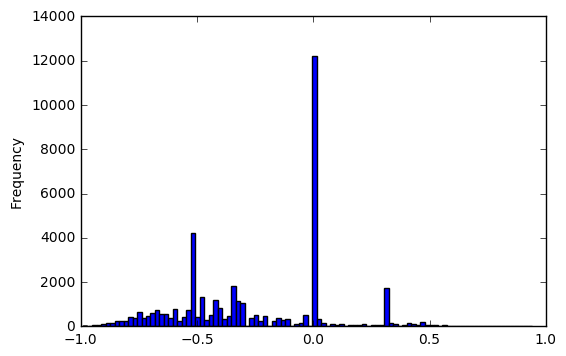

In [51]:
frankenFrame['compound'].plot.hist(stacked = True, bins = 100)

plt.show()


In [86]:
sortFrame = frankenFrame.sort_values(by = 'compound', ascending=[True])

In [50]:
sortFrame.reset_index(drop=True, inplace=True)

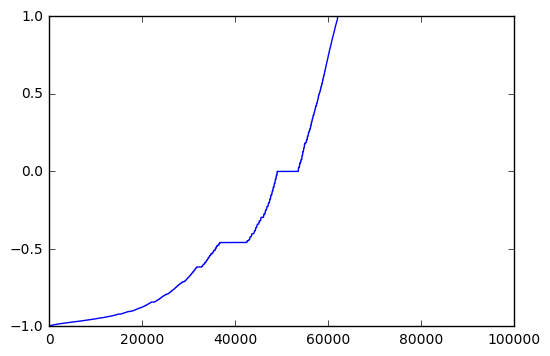

In [19]:
sortFrame['compound'].plot()
plt.axis([0, 100000, -1.0, 1.0])
plt.show()

In [51]:
checkManu = frankenFrame.groupby('model', as_index = False)['death'].mean()
manuCounts = frankenFrame['model'].value_counts()
remove = manuCounts[manuCounts <= 20].index
checkManu['model'].replace(remove, np.nan, inplace = True) 

In [87]:
frankenFrame.keys()

Index(['string', 'manufacturer', 'make', 'model', 'antilock', 'fire',
       'injured', 'death', 'compound'],
      dtype='object')

In [52]:
frankenFrame = frankenFrame.sort_values(by = 'compound', ascending=[True])

In [53]:
frankenFrame

,string,manufacturer,make,model,antilock,fire,injured,death,crash,miles,police_rpt_yn,cruise_cont_yn,fuel_sys,trans_type,veh_speed,tire_size,orig_equip_yn,seat_type,restraint_type,repaired_yn,medical_attn,veichles_towed_yn,compound
28935,"ABS, BRAKE FAILURE, WHEN BRAKES ARE APPLIED SKIDED AND HAVE EXTENDED STOPPING DISTANCE, IMPACT 12:00, SPPED 25 MPH. TT",GENERAL MOTORS CORP.,CHEVROLET,SUBURBAN,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9904
47530,AIR CONDITIONER FAILED DUE TO FREON LEAK. *SD,GENERAL MOTORS CORP.,GEO,METRO,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9873
47940,"UPON IMPACT, DURING FRONTAL CRASH AT APPROX. 30MPH, 1:00 ON FRONT BUMPER, DUAL AIRBAGS FAILED TO DEPLOY. *AK","NISSAN NORTH AMERICA, INC.",NISSAN,ALTIMA,NaN,N,1.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9811
38108,"BRAKES FAILED 5 TIMES, CAUSING ACCIDENT/INJURIES. *SD",FORD MOTOR COMPANY,FORD,F-350,NaN,N,3.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9783
27391,WHEEL CYLINDER FAILURE.,FORD MOTOR COMPANY,FORD,EXPLORER,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9768
22105,ABS BRAKES; WHEN APPLYING BRAKES VEHICLE VIBRATES. FRONT BRAKE PADS REPLACED (10) TIMES ALONG W/ROTORS TURNED. PLEASE DESCRIBE DETAILS. TT,FORD MOTOR COMPANY,FORD,AEROSTAR,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9751
25632,"AFTER VEHICLE HAS BEEN PARKED OVERNIGHT WITH FRONT END ELEVATED, POWER BRAKES DO NOT PROPERLY OPERATE UNTIL BRAKES ARE APPLIED 3 TIMES. *AK","SAAB CARS USA, INC.",SAAB,9000,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9742
44606,"UPON IMPACT, DURING FRONTAL CRASH AT APPROX. 35MPH, 12:00 ON FRONT BUMPER, DUAL AIR BAGS FAILED TO DEPLOY. *AK",General Motors LLC,CHEVROLET,CAVALIER,NaN,N,0.0,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9736
26765,"RECALL RELATED, PARTS ON BB ON 6-1-95, 94V169001 AND 93V125000, CONTACT DEALERSHIP WILL CALL ARE AVAILABLE AGAIN ON 10-23-95. TT",FORD MOTOR COMPANY,FORD,F150,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9734
24992,VEHICLE SMOKES/MELTS ELECTRICAL WIRES. *AW,GENERAL MOTORS CORP.,CHEVROLET,CHEVETTE,NaN,N,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9711


In [23]:
checkManu.reset_index(drop=True, inplace=True)
checkManu.dropna(how='any')

,model,death
2,(SEE MCGRAW EDISON),0.307692
10,02-034,0.000000
35,08L14-E09-100,0.000000
42,1 SERIES,0.000000
48,100,0.000000
59,1000GT,0.000000
74,10600,0.000000
101,1125CR,0.000000
102,1125R,0.000000
114,1200,0.000000


In [24]:
frankenFrame.keys()

Index(['string', 'manufacturer', 'make', 'model', 'antilock', 'fire',
       'injured', 'death', 'compound'],
      dtype='object')

In [57]:
checkManu = frankenFrame.groupby('model', as_index = False)['compound'].mean()
manuCounts = frankenFrame['model'].value_counts()
remove = manuCounts[manuCounts <= 20].index #if there are less than 20 items, drop them. 
checkManu['model'].replace(remove, np.nan, inplace = True) 

In [58]:
checkManu = checkManu.sort_values(by = 'compound', ascending=[True])

In [59]:
checkManu = checkManu.dropna(how='any')

In [60]:
print(checkManu)

                 model  compound
2403            COOPER -0.997200
1801               BMW -0.994000
2064        CARRI LITE -0.983700
3736               G10 -0.981650
2152        CHALLENGER -0.971700
5203               NPR -0.959900
871                528 -0.957500
4384             K3500 -0.952800
4465             KUMHO -0.952300
7185          ULTARA I -0.950900
4467          L SERIES -0.946600
4181               I30 -0.942800
4453            KODIAK -0.936000
897                540 -0.934900
5113              NAPA -0.920100
2637             DAMON -0.909700
1209               911 -0.904200
1668             AVION -0.902800
2221          CITATION -0.891800
2061           CARRERA -0.884000
6638            STYLUS -0.883533
3123            ESTEEM -0.872450
3911     GRAND CARAVAN -0.868900
4376               K20 -0.866386
2839             DUTCH -0.853100
1344        ADVENTURER -0.849250
1676             AXIOM -0.844200
7859             XR4TI -0.840480
5038                MT -0.831600
1745      

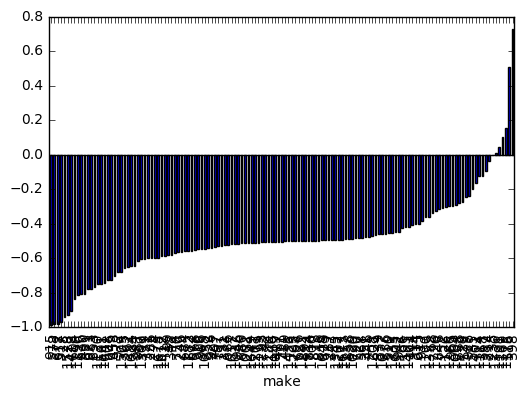

In [29]:
checkManu['compound'].plot.bar()
plt.axhline(0, color='k')
plt.xlabel('make')
plt.show()

In [30]:
print (frankenFrame[5])

KeyError: 5

In [31]:
import operator


In [32]:
sortVs = sorted(vs.items(), key=operator.itemgetter(0))

In [33]:
print(sortVs)

[('compound', -0.2263), ('neg', 0.079), ('neu', 0.921), ('pos', 0.0)]


In [34]:
carData['Ford Motor Company'].value_counts()

KeyError: 'Ford Motor Company'